In [1]:
import requests
import json
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [10]:
t = 100
dt = 1/12
np.arange(0, t+dt, dt)

(1201,)

In [3]:
# data = {'outer': {'inner': 'value'}}
# headers = {'Content-Type': 'application/json; charset=utf-8'}
# res = requests.get('http://127.0.0.1:8000/', headers=headers)

In [4]:
# df1 = pd.read_excel('입수파일/기간별.xls', skiprows=[0, 2])
# df2 = pd.read_excel('입수파일/기간별 (1).xls', skiprows=[0, 2])
# df = df1.merge(df2, on='일자', how='outer')
# df.to_excel('data/interest_rate_20y.xlsx', index=False)

In [5]:
# engine = create_engine('sqlite:///./db.db', echo=False)
# df0 = pd.read_excel('data/interest_rate_20y.xlsx')
# df = df0.copy()
# df = (df
#   .melt(id_vars='일자')
#   .rename(columns={'일자': 'BASE_DATE', 'variable': 'MATURITY', 'value': 'VALUE'})
#   .assign(BOND_TYPE = 'KTB')
#   .assign(BASE_DATE = lambda x: x['BASE_DATE'].str.replace('/', ''))
#   .assign(MATURITY = lambda x: x['MATURITY'].str.replace('년', '').astype(float))
#   [['BASE_DATE', 'BOND_TYPE', 'MATURITY', 'VALUE']]
# )
# df.to_sql('INT_RATE', con=engine, if_exists='replace', index=False)

In [27]:
engine = create_engine('sqlite:///./db.db', echo=False)
year = 2020
data = engine.execute(f"""
SELECT BASE_DATE,
       MATURITY,
       VALUE
  FROM INT_RATE
  WHERE BOND_TYPE="KTB"
    AND substr(BASE_DATE, 1, 4)='{year}'
""").fetchall()
result = json.dumps([{'BASE_DATE': d[0], 'MATURITY': d[1], 'VALUE': d[2]} for d in data])
# result

In [35]:
# headers = {'Content-Type': 'application/json; charset=utf-8'}
# res = requests.get('http://127.0.0.1:8000/int_rate/2020', headers=headers)
# pd.DataFrame(res.json())

,BASE_DATE,MATURITY,VALUE
0,20201231,1.0,0.656
1,20201230,1.0,0.656
2,20201229,1.0,0.646
3,20201228,1.0,0.636
4,20201224,1.0,0.620
...,...,...,...
1987,20200108,50.0,1.567
1988,20200107,50.0,1.588
1989,20200106,50.0,1.538
1990,20200103,50.0,1.546


In [124]:
type(r)

numpy.ndarray

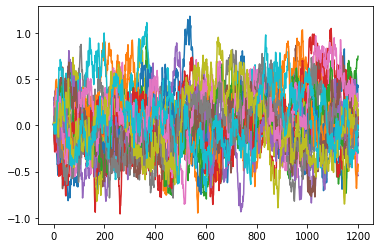

In [123]:
r0 = 0.01
dt = 1/12
a = 0.3
b = 0.04
sigma = 0.25
N = 20
t = 100
m = int(t/dt)
r = np.zeros([m+1, N])

r[0] = r0
np.random.seed(0)
dW = np.random.normal(0, np.sqrt(dt), [m, N])
for i in range(m):
  r[i+1] = r[i] + a*(b-r[i])*dt + sigma*dW[i]

plt.plot(r);